### Import Required Libraries

We import the necessary libraries for data handling, visualization, and clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

### Load Dataset

Load the disease-symptom dataset from a CSV file and preview the first few rows.

In [2]:
df = pd.read_csv('symptoms_dataset.csv')
df.head()

,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


### Data Inspection

Check the dataset shape and column names to understand the data structure.

In [3]:
print(f"Dataset shape: {df.shape}")
print("Columns:")
print(df.columns.tolist())

Dataset shape: (246945, 378)
Columns:
['diseases', 'anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements', 'chest tightness', 'palpitations', 'irregular heartbeat', 'breathing fast', 'hoarse voice', 'sore throat', 'difficulty speaking', 'cough', 'nasal congestion', 'throat swelling', 'diminished hearing', 'lump in throat', 'throat feels tight', 'difficulty in swallowing', 'skin swelling', 'retention of urine', 'groin mass', 'leg pain', 'hip pain', 'suprapubic pain', 'blood in stool', 'lack of growth', 'emotional symptoms', 'elbow weakness', 'back weakness', 'pus in sputum', 'symptoms of the scrotum and testes', 'swelling of scrotum', 'pain in testicles', 'flatulence', 'pus draining from ear', 'jaundice', 'mass in scrotum', 'white discharge from eye', 'irritable infant', 'abusing alcohol', 'fainting', 'hostile behavior', 'drug abuse', 'sharp abdominal pain', 'feelin

### Data Cleaning and Preprocessing

- Remove any rows with missing values.
- Separate the symptom features (X) and disease labels (y).

In [4]:
df.dropna(inplace=True)

X = df.drop(columns=['diseases'])
y = df['diseases']

print(f"Features shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Features shape: (246945, 377)
Labels shape: (246945,)


### KMeans Clustering

Perform KMeans clustering on symptom data to group diseases based on symptom similarity.

Here, we use 5 clusters, but this number can be tuned.

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_

df[['diseases', 'Cluster']].head(10)

,diseases,Cluster
0,panic disorder,4
1,panic disorder,4
2,panic disorder,4
3,panic disorder,4
4,panic disorder,4
5,panic disorder,4
6,panic disorder,4
7,panic disorder,4
8,panic disorder,4
9,panic disorder,4


### Dimensionality Reduction and Visualization

Use t-SNE to reduce the high-dimensional symptom data into two dimensions for visualization.

Plot diseases colored by their assigned cluster.

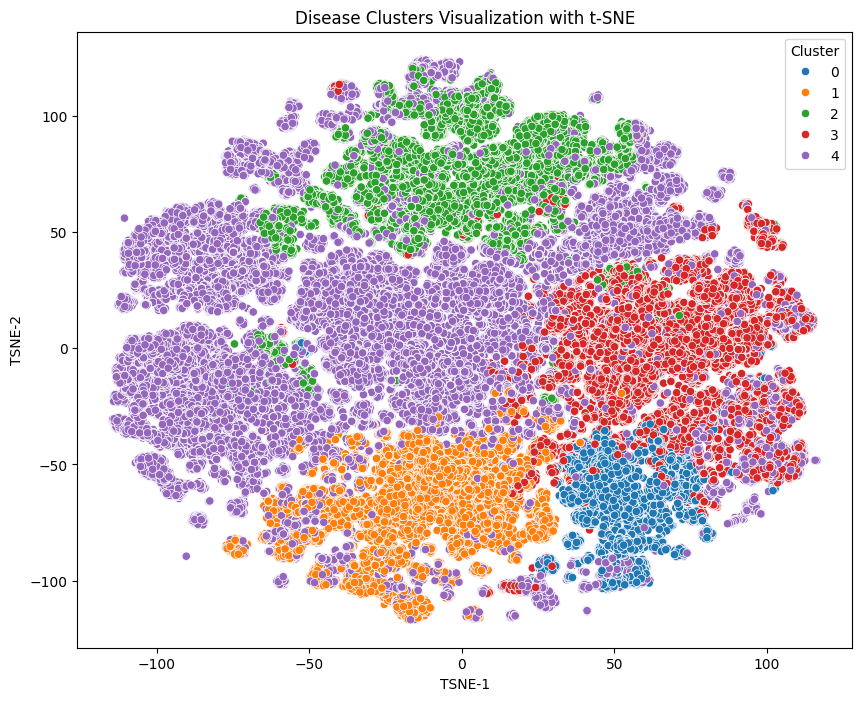

In [6]:
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

df['TSNE-1'] = X_embedded[:, 0]
df['TSNE-2'] = X_embedded[:, 1]

plt.figure(figsize=(10,8))
sns.scatterplot(
    x='TSNE-1', y='TSNE-2',
    hue='Cluster',
    palette='tab10',
    data=df,
    legend='full'
)
plt.title('Disease Clusters Visualization with t-SNE')
plt.show()

### Cluster Size Distribution

Visualize how many diseases fall into each cluster.

In [ ]:
cluster_counts = df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Number of Diseases')
plt.title('Number of Diseases per Cluster')
plt.show()

### Top Symptoms Per Cluster

Identify the most common symptoms in each cluster by calculating the average symptom presence.

In [ ]:
for cluster_num in sorted(df['Cluster'].unique()):
    print(f"\nTop symptoms in Cluster {cluster_num}:")
    cluster_data = X[df['Cluster'] == cluster_num]
    symptom_means = cluster_data.mean().sort_values(ascending=False).head(10)
    print(symptom_means)

In [ ]:
cluster_symptoms = X.copy()
cluster_symptoms['Cluster'] = df['Cluster']

mean_symptoms = cluster_symptoms.groupby('Cluster').mean()

plt.figure(figsize=(15,8))
sns.heatmap(mean_symptoms.iloc[:, :30], cmap='YlGnBu', cbar_kws={'label': 'Average Symptom Presence'})
plt.title('Heatmap of Average Symptom Presence per Cluster (Top 30 Symptoms)')
plt.xlabel('Symptoms')
plt.ylabel('Cluster')
plt.show()

### Conclusion

- Diseases have been clustered effectively based on their symptom profiles.
- Visualization helps interpret cluster relationships.
- Symptom patterns per cluster can assist medical understanding.